In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
DB_512 = os.path.join(os.getcwd(), '512', 'history', 'model_EfficientNetB0_512.csv')
DB_1024 = os.path.join(os.getcwd(), '1024', 'history', 'model_EfficientNetB0.csv')
DB_512_512 = os.path.join(os.getcwd(), '512_512', 'history', 'model_EfficientNetB0.csv')
DB_1024_1024 = os.path.join(os.getcwd(), '1024_1024', 'history', 'model_EfficientNetB0.csv')

In [3]:
df_a = []
df_512 = pd.read_csv(DB_512)
df_1024 = pd.read_csv(DB_1024)
df_512_512 = pd.read_csv(DB_512_512)
df_1024_1024 = pd.read_csv(DB_1024_1024)

df_a.append(df_512)
df_a.append(df_1024)
df_a.append(df_512_512)
df_a.append(df_1024_1024)

for db in df_a:
    db.columns = [x.strip() for x in db.columns]

In [4]:
df_a[1].head()

,epoch,accuracy,validation_accuracy,loss,validation_loss
0,0,0.523166,0.587500,5.583064,2.693172
1,1,0.626912,0.578333,2.386385,2.517301
2,2,0.626469,0.559167,2.324448,2.618508
3,3,0.642540,0.575000,2.277608,2.597030
4,4,0.635225,0.566667,2.293374,2.648826


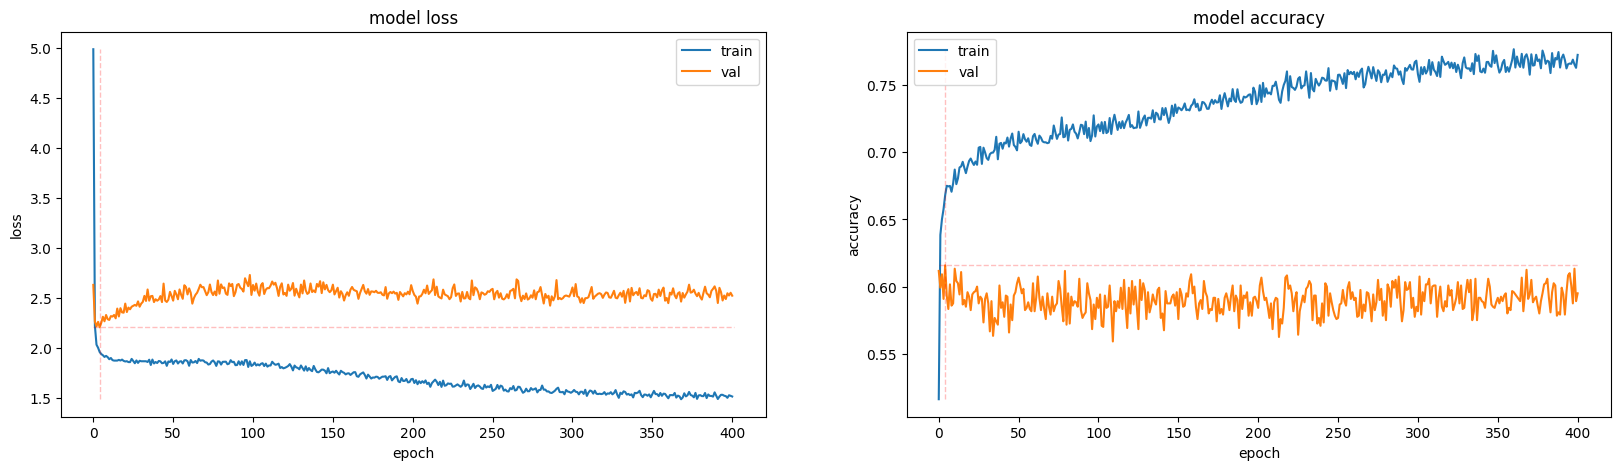

Loss     : Train : 1.962 Test : 2.209
Accuracy : Train : 66.79 Test : 61.58


In [55]:
df = df_a[0].iloc[:][:]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

min_ll = min([df['loss'].min(), df['validation_loss'].min()])
max_ll = max([df['loss'].max(), df['validation_loss'].max()])

min_aa = min([df['accuracy'].min(), df['validation_accuracy'].min()])
max_aa = max([df['accuracy'].max(), df['validation_accuracy'].max()])

max_acc = 0
min_loss = 100
index = 0
for i,row in df.iterrows():
    if row['validation_accuracy'] >= max_acc and row['validation_loss'] <= min_loss:
        max_acc = row['validation_accuracy']
        min_loss = row['validation_loss']
        index = i

ax1.set_title('model loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.plot(df['loss'])
ax1.plot(df['validation_loss'])
ax1.plot((0, len(df)), (min_loss, min_loss), linewidth=1, alpha=0.25, linestyle='dashed', color='red')
ax1.plot((index, index), (min_ll, max_ll), linewidth=1, alpha=0.25, linestyle='dashed', color='red')
ax1.legend(['train', 'val'], loc='upper right')

ax2.set_title('model accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.plot(df['accuracy'])
ax2.plot(df['validation_accuracy'])
ax2.plot((0, len(df)), (max_acc, max_acc), linewidth=1, alpha=0.25, linestyle='dashed', color='red')
ax2.plot((index, index), (min_aa, max_aa), linewidth=1, alpha=0.25, linestyle='dashed', color='red')
ax2.legend(['train', 'val'], loc='upper left')
plt.show()



print('Loss     : Train :', "%.3f" % df['loss'].iloc[index], 'Test :', "%.3f" %df['validation_loss'].iloc[index])
print('Accuracy : Train :', "%.2f" % (df['accuracy'].iloc[index] * 100), 'Test :', "%.2f" % (df['validation_accuracy'].iloc[index] * 100))

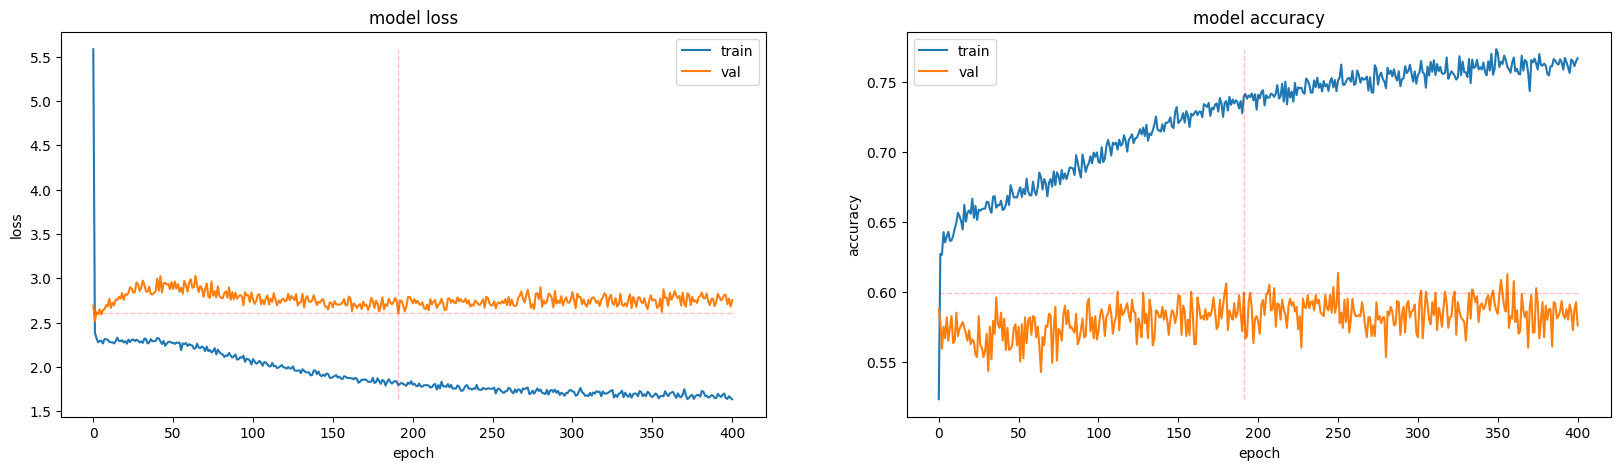

Epoch    :  191
Loss     : Train : 1.793 Test : 2.608
Accuracy : Train : 73.97 Test : 59.92


In [5]:
df = df_a[1].iloc[:][:]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

min_ll = min([df['loss'].min(), df['validation_loss'].min()])
max_ll = max([df['loss'].max(), df['validation_loss'].max()])

min_aa = min([df['accuracy'].min(), df['validation_accuracy'].min()])
max_aa = max([df['accuracy'].max(), df['validation_accuracy'].max()])

max_acc = 0
min_loss = 100
index = 0
for i,row in df.iterrows():
    if row['validation_accuracy'] >= max_acc and row['validation_loss'] <= min_loss:
        max_acc = row['validation_accuracy']
        min_loss = row['validation_loss']
        index = i

ax1.set_title('model loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.plot(df['loss'])
ax1.plot(df['validation_loss'])
ax1.plot((0, len(df)), (min_loss, min_loss), linewidth=1, alpha=0.25, linestyle='dashed', color='red')
ax1.plot((index, index), (min_ll, max_ll), linewidth=1, alpha=0.25, linestyle='dashed', color='red')
ax1.legend(['train', 'val'], loc='upper right')

ax2.set_title('model accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.plot(df['accuracy'])
ax2.plot(df['validation_accuracy'])
ax2.plot((0, len(df)), (max_acc, max_acc), linewidth=1, alpha=0.25, linestyle='dashed', color='red')
ax2.plot((index, index), (min_aa, max_aa), linewidth=1, alpha=0.25, linestyle='dashed', color='red')
ax2.legend(['train', 'val'], loc='upper left')
plt.show()


print('Epoch    : ', index)
print('Loss     : Train :', "%.3f" % df['loss'].iloc[index], 'Test :', "%.3f" %df['validation_loss'].iloc[index])
print('Accuracy : Train :', "%.2f" % (df['accuracy'].iloc[index] * 100), 'Test :', "%.2f" % (df['validation_accuracy'].iloc[index] * 100))

In [26]:
df = pd.DataFrame({'Models':['Best Submission Score'],\
                   '1024 Model':[1.65],\
                   '512 Model':[1.35],})
df.head(20)

,Models,1024 Model,512 Model
0,Best Submission Score,1.65,1.35


In [27]:
# Variables
first_bar = df['512 Model']
first_bar_label = 'Baseline Model'
first_bar_color = '#4098d7'

second_bar = df['1024 Model']
second_bar_label = '1024 Model'
second_bar_color = '#fc9e59'
labels = df['Models']
width = 0.4  # the width of the bars
plot_title = 'Classification score Analysis'
title_size = 18
subtitle = 'Comparison between baseline model with 512 connections vs 1024'
filename = 'barh-plot'

/var/folders/_b/x6dm1_4j36g1cbgmkthrttgm0000gn/T/ipykernel_20215/2497852529.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


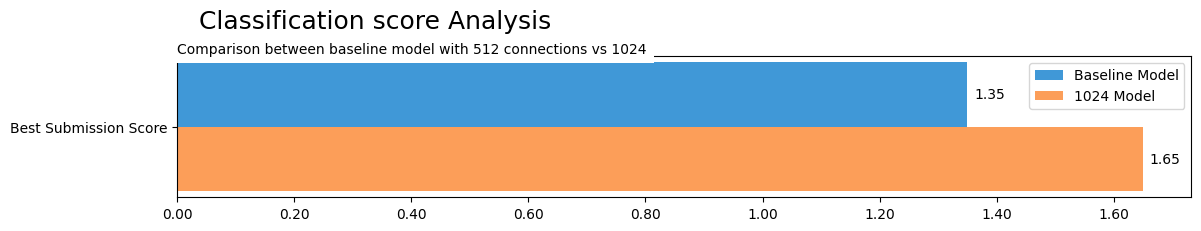

In [28]:
fig, ax = plt.subplots(figsize=(1,2), facecolor=(1, 1, 1))
plt.tight_layout()

y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.02f}'))

# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.195, 1.7])

# Adjust subplots
plt.subplots_adjust(left=0.35, top=0.9)

# Set subtitle
tform = ax.get_xaxis_transform() 
ann = ax.annotate(subtitle, xy=(0, 1.0175), fontsize=10, xycoords=tform, bbox=dict(boxstyle='square, pad=0.5', fc='#ffffff', ec='none'))

# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.02f}'.format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points',
        va='center',                
        ha=ha)

# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()

# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0))

plt.savefig(filename+'.png', facecolor=(1, 1, 1))

In [33]:
df = pd.DataFrame({'Models':['Similar Width', 'Increased Width', 'Decremented Width'],\
                   'High Depth Model':[2.09, 2.16, 2.17],\
                   'Baseline Model':[1.35, 1.35, 1.35],})
df.head(20)

,Models,High Depth Model,Baseline Model
0,Similar Width,2.09,1.35
1,Increased Width,2.16,1.35
2,Decremented Width,2.17,1.35


In [34]:
# Variables
first_bar = df['Baseline Model']
first_bar_label = 'Baseline Model'
first_bar_color = '#4098d7'

second_bar = df['High Depth Model']
second_bar_label = 'High Depth Model'
second_bar_color = '#fc9e59'
labels = df['Models']
width = 0.4  # the width of the bars
plot_title = 'Classification score Analysis'
title_size = 18
subtitle = 'Comparison between baseline model with new architectures'
filename = 'barh-plot'

/var/folders/_b/x6dm1_4j36g1cbgmkthrttgm0000gn/T/ipykernel_20215/2544555739.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


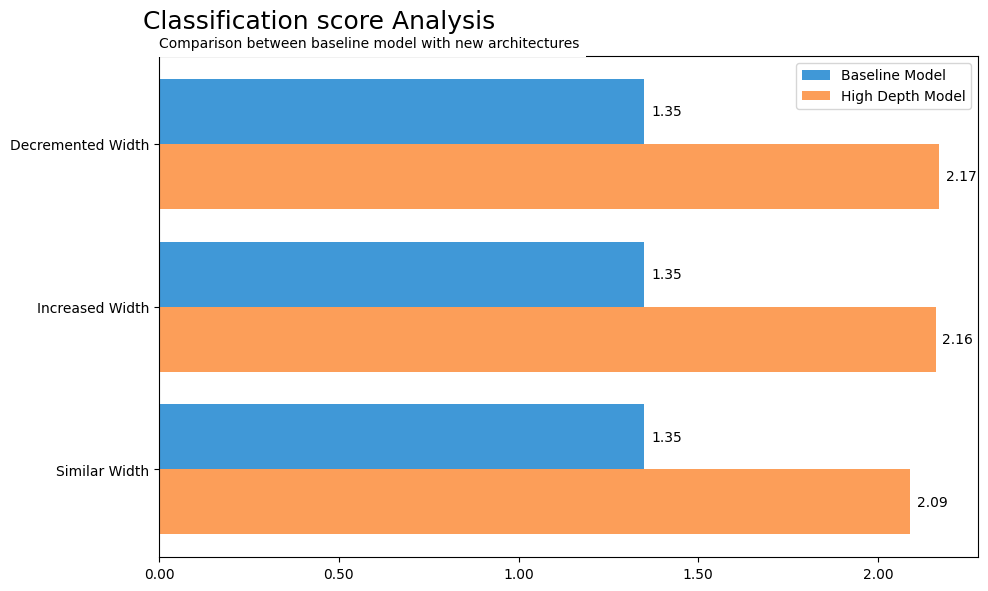

In [36]:
fig, ax = plt.subplots(figsize=(13,6), facecolor=(1, 1, 1))
plt.tight_layout()

y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

# Format ticks
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.02f}'))

# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.195, 1.7])

# Adjust subplots
plt.subplots_adjust(left=0.35, top=0.9)

# Set subtitle
tform = ax.get_xaxis_transform() 
ann = ax.annotate(subtitle, xy=(0, 1.0175), fontsize=10, xycoords=tform, bbox=dict(boxstyle='square, pad=0.5', fc='#ffffff', ec='none'))

# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.02f}'.format(x_value)
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points',
        va='center',                
        ha=ha)

# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()

# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0))

plt.savefig(filename+'.png', facecolor=(1, 1, 1))